# Student Dataset Project

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
import statsmodels as sm

In [2]:
std = pd.read_csv('stddata.csv')
std

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,816,female,group D,high school,standard,none,single,sometimes,no,2.0,school_bus,5 - 10,59,61,65
30637,890,male,group E,high school,standard,none,single,regularly,no,1.0,private,5 - 10,58,53,51
30638,911,female,NaN,high school,free/reduced,completed,married,sometimes,no,1.0,private,5 - 10,61,70,67
30639,934,female,group D,associate's degree,standard,completed,married,regularly,no,3.0,school_bus,5 - 10,82,90,93


# About Dataset

In [3]:
std.head()

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


In [4]:
std.tail()

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
30636,816,female,group D,high school,standard,none,single,sometimes,no,2.0,school_bus,5 - 10,59,61,65
30637,890,male,group E,high school,standard,none,single,regularly,no,1.0,private,5 - 10,58,53,51
30638,911,female,NaN,high school,free/reduced,completed,married,sometimes,no,1.0,private,5 - 10,61,70,67
30639,934,female,group D,associate's degree,standard,completed,married,regularly,no,3.0,school_bus,5 - 10,82,90,93
30640,960,male,group B,some college,standard,none,married,never,no,1.0,school_bus,5 - 10,64,60,58


In [5]:
std[['NrSiblings',	'MathScore',	'ReadingScore',	'WritingScore']].describe()

,NrSiblings,MathScore,ReadingScore,WritingScore
count,29069.000000,30641.000000,30641.000000,30641.000000
mean,2.145894,66.558402,69.377533,68.418622
std,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,10.000000,4.000000
25%,1.000000,56.000000,59.000000,58.000000
50%,2.000000,67.000000,70.000000,69.000000
75%,3.000000,78.000000,80.000000,79.000000
max,7.000000,100.000000,100.000000,100.000000


In [6]:
std.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


# Dropping Unnamed Column

In [7]:
std = std.drop('Unnamed: 0', axis = 1)
print(std.head())

   Gender EthnicGroup          ParentEduc     LunchType TestPrep  \
0  female         NaN   bachelor's degree      standard     none   
1  female     group C        some college      standard      NaN   
2  female     group B     master's degree      standard     none   
3    male     group A  associate's degree  free/reduced     none   
4    male     group C        some college      standard     none   

  ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings TransportMeans  \
0             married     regularly          yes         3.0     school_bus   
1             married     sometimes          yes         0.0            NaN   
2              single     sometimes          yes         4.0     school_bus   
3             married         never           no         1.0            NaN   
4             married     sometimes          yes         0.0     school_bus   

  WklyStudyHours  MathScore  ReadingScore  WritingScore  
0            < 5         71            71            74  


# Delete Null Values

In [10]:
std.isnull().sum()

Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

In [11]:
std1 = std.dropna()

# Exploratory Data ANALYSIS

# Gender Distribution

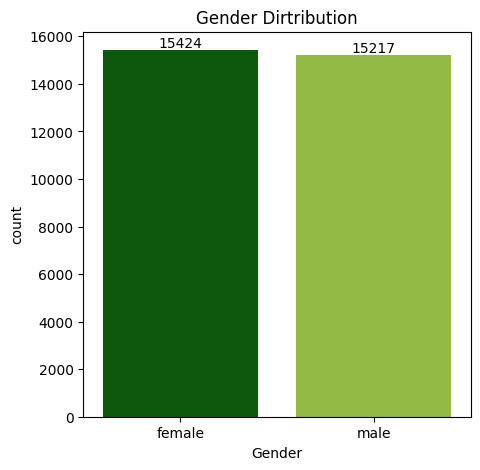

In [12]:
plt.figure(figsize=(5,5))
ax = sns.countplot(data=std, x='Gender', hue='Gender', palette={'male': 'yellowgreen', 'female': 'darkgreen'})
for container in ax.containers:
    ax.bar_label(container)
plt.title('Gender Dirtribution')    
plt.show()

In [ ]:
# from above graph females are more than male.

# Parents Education Degree Impact On Students Performance

In [13]:
gb = std.groupby('ParentEduc').agg({'MathScore' : 'mean','ReadingScore' : 'mean','WritingScore' : 'mean'})
gb

,MathScore,ReadingScore,WritingScore
ParentEduc,,,
associate's degree,68.365586,71.124324,70.299099
bachelor's degree,70.466627,73.062020,73.331069
high school,64.435731,67.213997,65.421136
master's degree,72.336134,75.832921,76.356896
some college,66.390472,69.179708,68.501432
some high school,62.584013,65.510785,63.632409


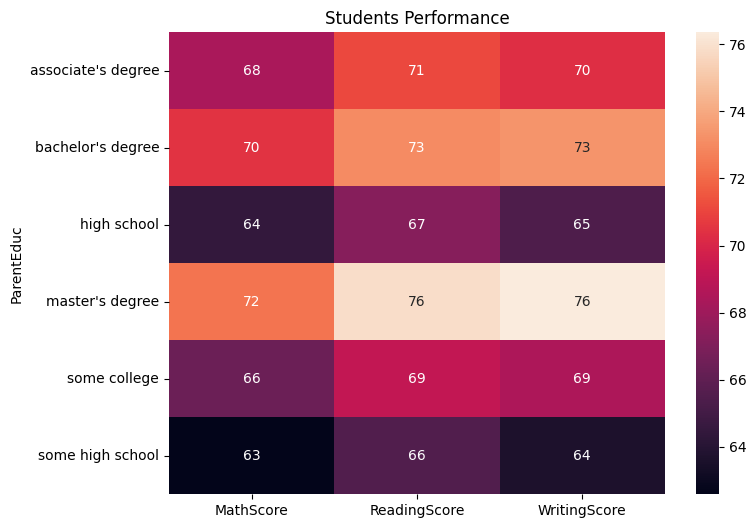

In [14]:
plt.figure(figsize=(8,6))
sns.heatmap(gb, annot = True)
plt.title('Students Performance')
plt.show()

In [ ]:
# The above visual shows that parents eduction have a good impact on their children.

# Parents Marital Status Impact On Students Performance

In [15]:
gb2 = std.groupby('ParentMaritalStatus').agg({'MathScore' : 'mean','ReadingScore' : 'mean','WritingScore' : 'mean'})
gb2

,MathScore,ReadingScore,WritingScore
ParentMaritalStatus,,,
divorced,66.691197,69.655011,68.799146
married,66.657326,69.389575,68.420981
single,66.165704,69.157250,68.174440
widowed,67.368866,69.651438,68.563452


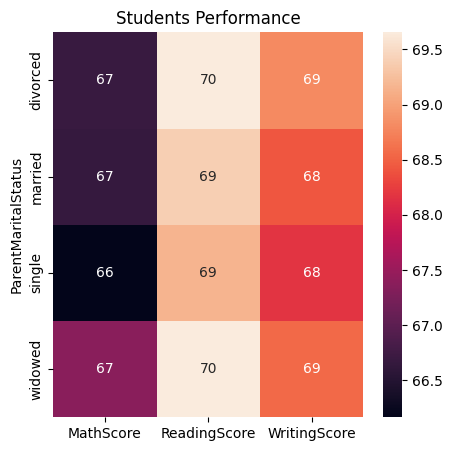

In [50]:
plt.figure(figsize=(5,5))
sns.heatmap(gb2, annot = True)
plt.title('Students Performance')
plt.show()

In [ ]:
# from the above viual we concluded that there is negligible impact on the students due to their parents marital status.

# Distribution of Ethnic Group

In [16]:
std['EthnicGroup'].unique()

array([nan, 'group C', 'group B', 'group A', 'group D', 'group E'],
      dtype=object)

In [17]:
groupA = std.loc[(std['EthnicGroup'] == 'group A')].count()
print(groupA)

Gender                 2219
EthnicGroup            2219
ParentEduc             2078
LunchType              2219
TestPrep               2081
ParentMaritalStatus    2121
PracticeSport          2167
IsFirstChild           2168
NrSiblings             2096
TransportMeans         1999
WklyStudyHours         2146
MathScore              2219
ReadingScore           2219
WritingScore           2219
dtype: int64


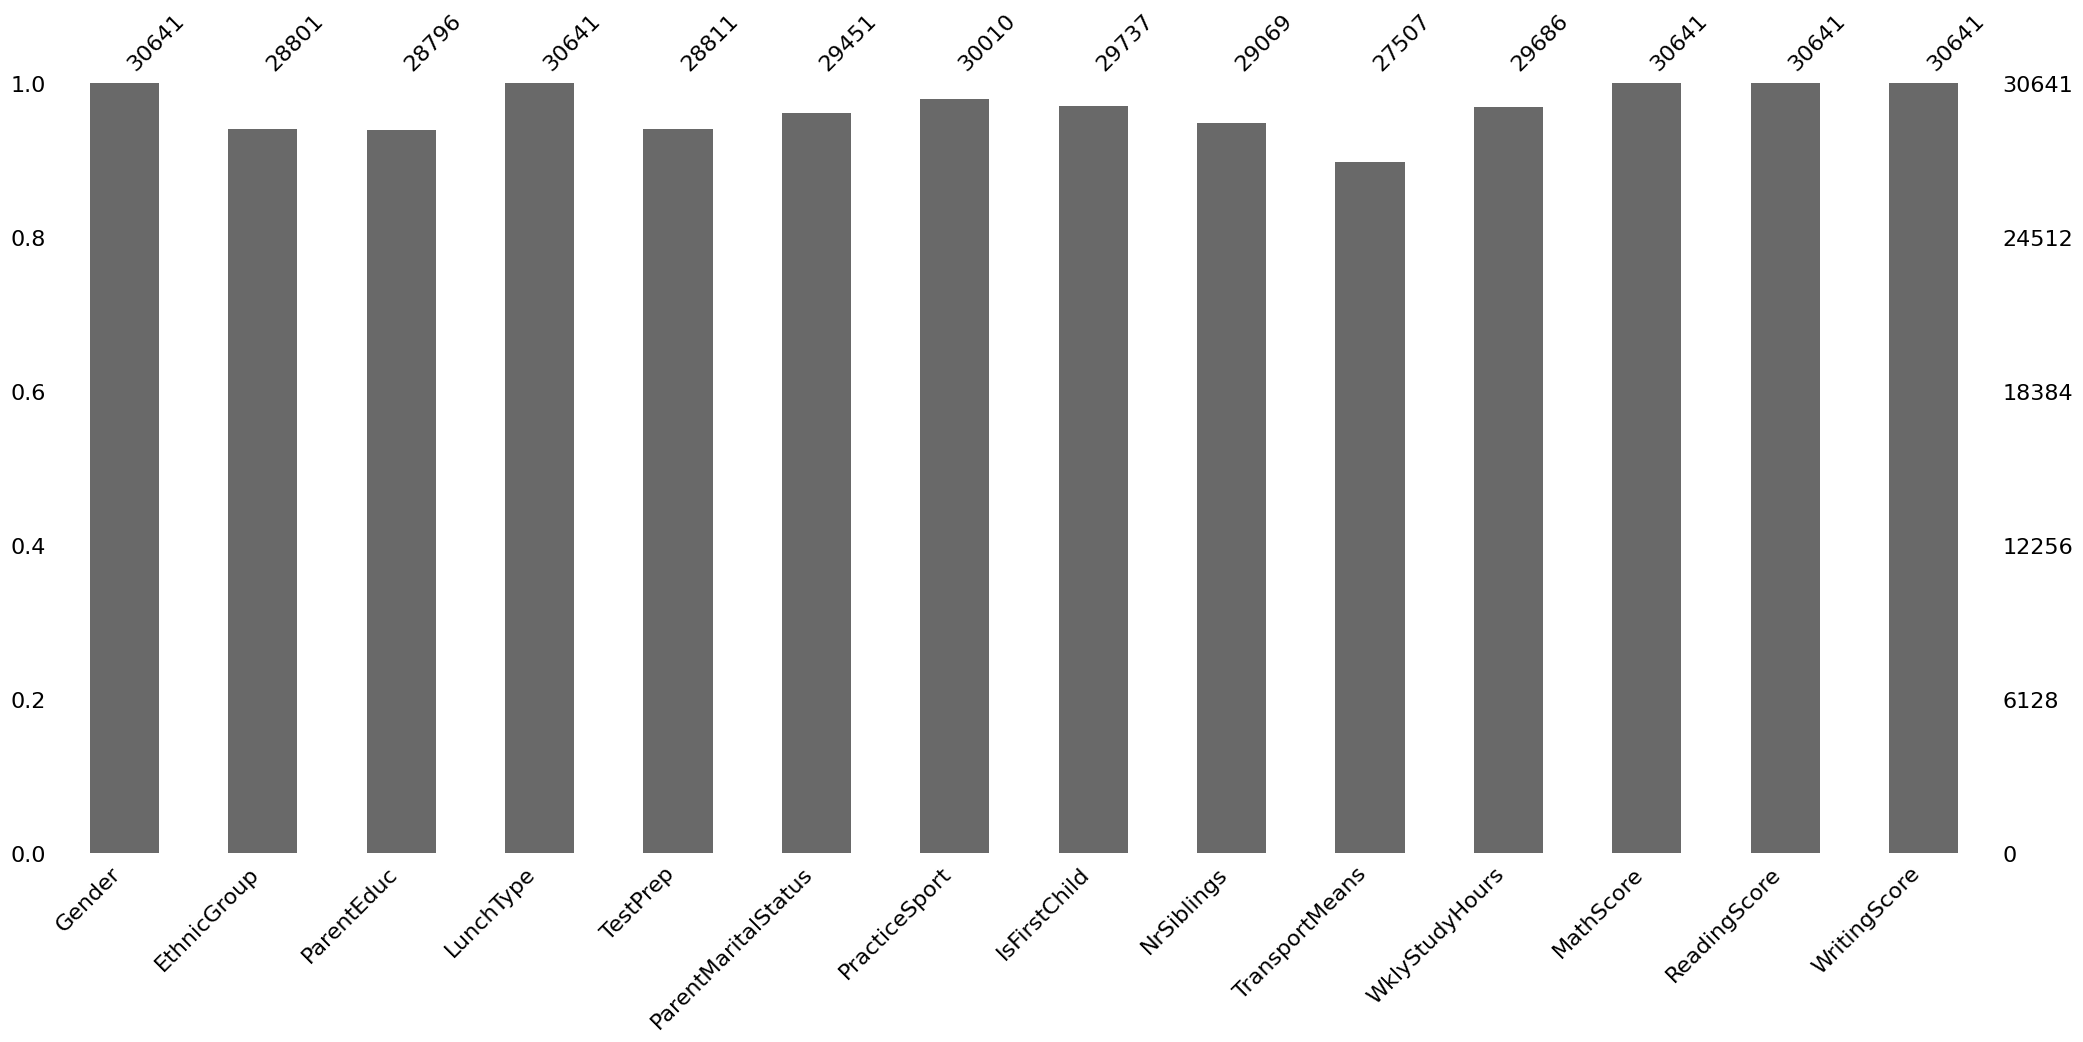

In [29]:
msno.bar(std);

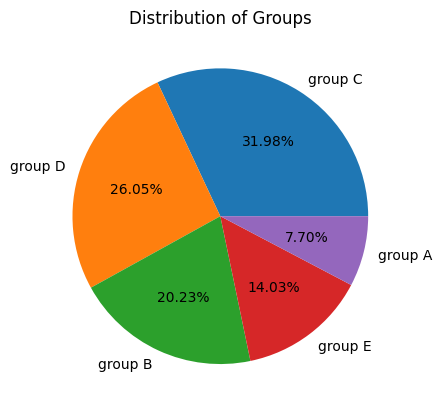

In [23]:
std_filtered = std.dropna(subset=['EthnicGroup'])

# Count the occurrences of each ethnic group
group_counts = std_filtered['EthnicGroup'].value_counts()

# Create the pie chart
plt.pie(group_counts, labels=group_counts.index, autopct = '%1.2f%%')
plt.title('Distribution of Groups')
plt.show()

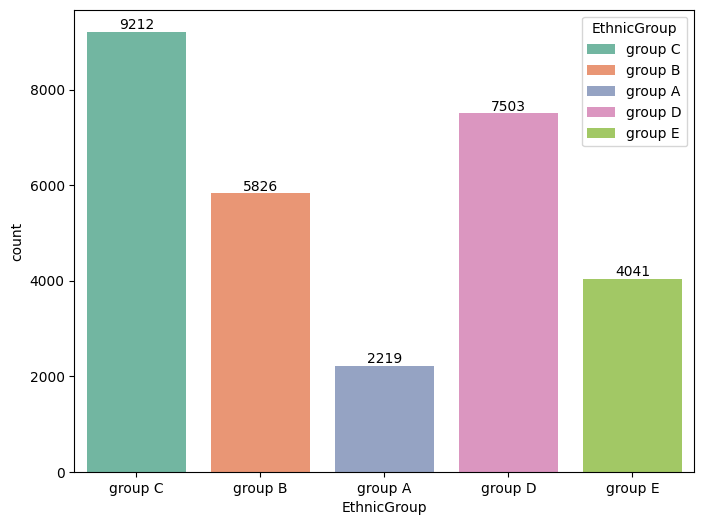

In [24]:
plt.figure(figsize=(8, 6))  
ax = sns.countplot(data=std, x='EthnicGroup', hue = 'EthnicGroup', palette='Set2') 
for container in ax.containers:
    ax.bar_label(container)
plt.show()

In [25]:
gb4 = std.groupby('PracticeSport').agg({'MathScore' : 'mean','ReadingScore' : 'mean','WritingScore' : 'mean'})
gb4

,MathScore,ReadingScore,WritingScore
PracticeSport,,,
never,64.171079,68.337662,66.522727
regularly,67.839155,69.943019,69.604003
sometimes,66.274831,69.241307,68.072438


# Srudents Performance

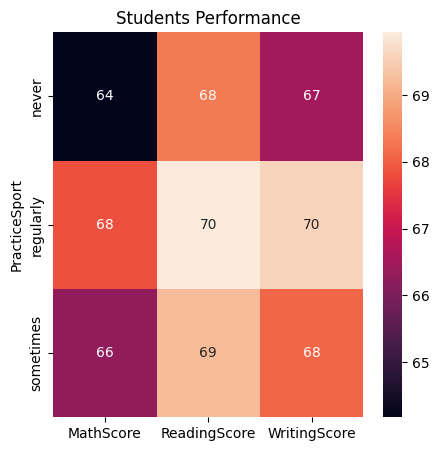

In [26]:
plt.figure(figsize=(5,5))
sns.heatmap(gb4, annot = True)
plt.title('Students Performance')
plt.show()

In [27]:
std.columns

Index(['Gender', 'EthnicGroup', 'ParentEduc', 'LunchType', 'TestPrep',
       'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild', 'NrSiblings',
       'TransportMeans', 'WklyStudyHours', 'MathScore', 'ReadingScore',
       'WritingScore'],
      dtype='object')

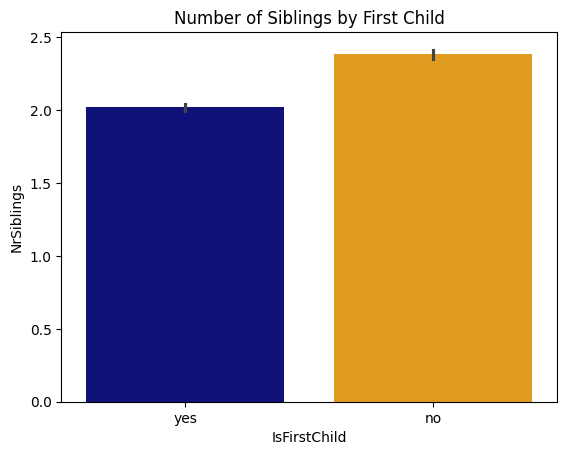

In [43]:
sns.barplot(x='IsFirstChild', y='NrSiblings', data=std, hue='IsFirstChild', palette=['darkblue', 'orange'])
plt.title('Number of Siblings by First Child')
plt.show()

In [ ]:
# students who are first children their siblings count is 2
# students who are not first children their siblings count is more than 2

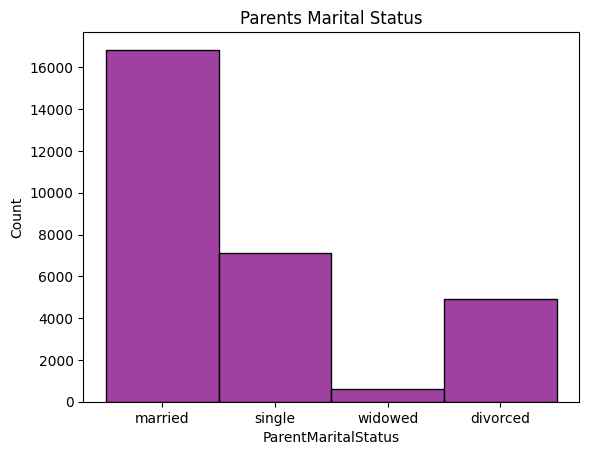

In [28]:
sns.histplot(std['ParentMaritalStatus'], bins=4, color='purple')
plt.title('Parents Marital Status')
plt.show()

In [ ]:
# this graph shows married parents more and widowed is the lowest.

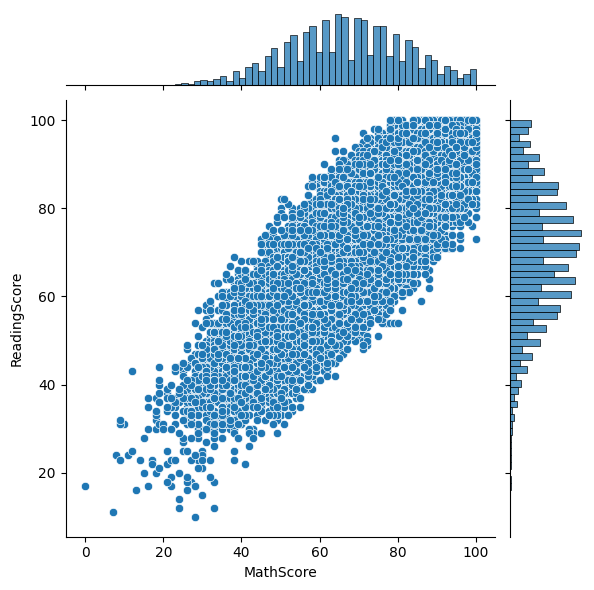

In [65]:
sns.jointplot(x='MathScore', y='ReadingScore', data = std)

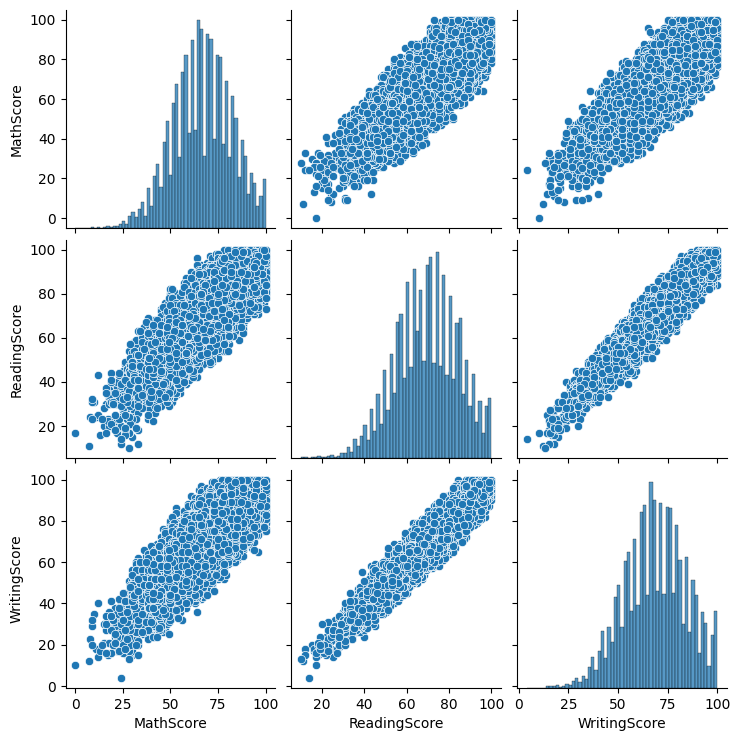

In [84]:
sns.pairplot(std, vars = ['MathScore', 'ReadingScore', 'WritingScore'])

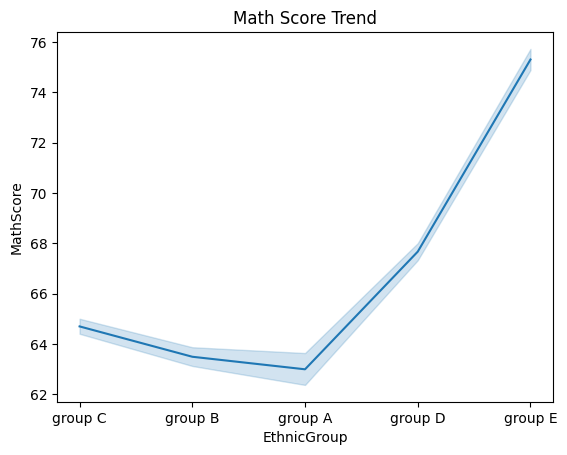

In [33]:
sns.lineplot(x = 'EthnicGroup', y = 'MathScore', data = std)
plt.title('Math Score Trend')
plt.show()

In [ ]:
# groupA has lowest math score
# groupE has highest math score

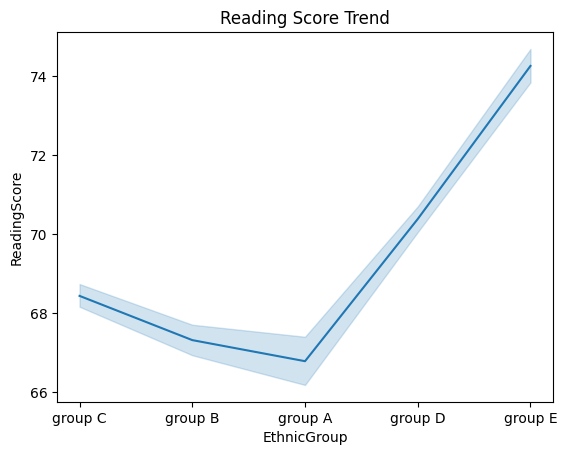

In [37]:
sns.lineplot(x = 'EthnicGroup', y = 'ReadingScore', data = std)
plt.title('Reading Score Trend')
plt.show()

In [ ]:
# groupA has lowest reading score
# groupE has highest reading score

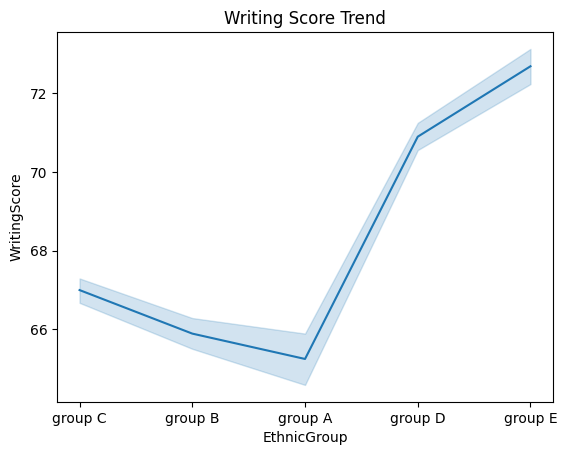

In [36]:
sns.lineplot(x = 'EthnicGroup', y = 'WritingScore', data = std)
plt.title('Writing Score Trend')
plt.show()

In [ ]:
# groupA has lowest Writing score
# groupE has highest Writing score
# Overall, the performance of Group E students is excellent, while Group A students' performance is poor.